# **손글씨를 분류해 봅시다 - 프로젝트1**
손글씨 이미지를 제대로 0~9까지 열가지 카테고리로 분류해보는 실습을 해보겠습니다.

## Step1. 필요한 모듈 import하기

In [ ]:
# 필요한 모듈들을 먼저 불러옵니다.
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

## Step2. 데이터 준비 및 이해

In [ ]:
#손글씨 데이터 불러오기
digit = load_digits()
print(digit.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


데이터의 형태를 확인해보겠습니다.

In [ ]:
digit.data.shape

(1797, 64)

총 1797개의 데이터가있고 특성은 64개가 있습니다. 이는 8X8크기의 이미지를 의미합니다. 어떻게 생겼는지 맷플롯립으로 그려보겠습니다.

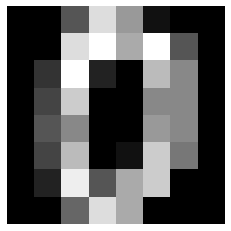

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(digit.data[0].reshape(8, 8), cmap='gray') #데이터의 첫번째행을 그려봅니다.
plt.axis('off') #축 제거
plt.show()

손글씨로 0이 그려진 이미지인거 같습니다. 이어서 타겟데이터를 확인해 보겠습니다.

In [ ]:
print(digit.target.shape)
print(digit.target)

(1797,)
[0 1 2 ... 8 9 8]


데이터와 같은 개수의 타겟데이터가 존재하는걸 확인할 수 있습니다.
그리고 타겟에 여러개의 숫자가 적혀있는것을 확인할 수 있습니다. 타겟레이블의 이 숫자들은 무엇을 의미하는걸까요? target_names로 확인해보겠습니다.

In [ ]:
digit.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

타겟레이블에는 0부터 9까지의 숫자들이 모여있습니다. 이것은 데이터에들어있는 각 이미지에 해당하는 숫자입니다. 그러면 풀어야할 문제는 각 이미지데이터와 타깃으로 모델을 훈련시키고 특정이미지가 주어졌을때 그 이미지가 뜻하는 숫자가 어떤 숫자인지 맞추는것입니다. 

## Step3. train,test 데이터분리

훈련데이터와 테스트데이터를 생성해보겠습니다.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(digit.data, digit.target, test_size = 0.2, random_state = 15)
print('X_train 개수 :', X_train.shape[0])
print('X_test 개수 :', X_test.shape[0])
print('y_train 개수 :', y_train.shape[0])
print('y_test 개수:', y_test.shape[0])
print('')
print(y_train[:20])

X_train 개수 : 1437
X_test 개수 : 360
y_train 개수 : 1437
y_test 개수: 360

[6 4 3 3 2 1 7 6 8 9 7 4 0 1 3 4 4 1 2 0]


훈련데이터와 테스트데이터가 4:1비율로 잘 섞였고, 타깃데이터를 확인해보니 랜덤으로 잘 섞여진것같아 훈련하는데 문제는 없을 것 같습니다.

## Step4. 다양한 모델로 학습시키기

# Decision Tree
Decision Tree모델을 세워보고 성능을 확인해봅시다.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=15) # 모델 세우기
decision_tree.fit(X_train, y_train) # 모델 훈련시키기
y_pred = decision_tree.predict(X_test) # 해당 모델을 이용해 테스트데이터를 예측해 y_pred에 집어넣습니다


해당 모델의 최종 평가를 확인해봅시다.

In [ ]:
print(classification_report(y_test, y_pred)) # 모델 성능을 평가해봅니다

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        31
           1       0.84      0.82      0.83        38
           2       0.73      0.87      0.80        38
           3       0.71      0.74      0.73        27
           4       0.94      0.80      0.87        41
           5       0.87      0.94      0.90        35
           6       0.87      0.89      0.88        38
           7       0.91      0.94      0.93        34
           8       0.79      0.77      0.78        35
           9       0.80      0.77      0.79        43

    accuracy                           0.84       360
   macro avg       0.85      0.85      0.84       360
weighted avg       0.85      0.84      0.85       360



해당 모델의 정확도는 84%가 나왔습니다.
다음으로 Random Forest모델을 사용해 보겠습니다.

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(random_state=15) # 모델 세우기
RFC.fit(X_train,y_train) # 모델 훈련
y_pred2 = RFC.predict(X_test) # 테스트데이터 예측
print(classification_report(y_test, y_pred2)) # 모델 성능 평가

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        31
           1       0.97      0.97      0.97        38
           2       1.00      1.00      1.00        38
           3       0.96      0.96      0.96        27
           4       0.95      0.98      0.96        41
           5       0.97      1.00      0.99        35
           6       1.00      0.97      0.99        38
           7       0.97      1.00      0.99        34
           8       0.97      0.94      0.96        35
           9       0.98      0.98      0.98        43

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.98      0.97      0.97       360



모델의 정확도가 97%가 나왔습니다!! DecisionTree에 비교해서 크게 향상된것을 확인할 수 있습니다.

이어서 SVM모델을 사용하겠습니다.
# SVM

In [ ]:
from sklearn import svm
svm_model = svm.SVC() # 모델세우기
svm_model.fit(X_train, y_train) # 모델훈련
y_pred3 = svm_model.predict(X_test) # 테스트데이터 레이블 예측
print(classification_report(y_test, y_pred3)) # 모델 성능 평가

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        31
           1       0.95      1.00      0.97        38
           2       1.00      1.00      1.00        38
           3       0.96      0.96      0.96        27
           4       0.98      0.98      0.98        41
           5       1.00      1.00      1.00        35
           6       1.00      1.00      1.00        38
           7       1.00      1.00      1.00        34
           8       0.97      0.94      0.96        35
           9       0.98      0.98      0.98        43

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



SVM모델의 정확도는 98%입니다.

이어서 SGD Classifier을 사용하겠습니다.
# SGD Classifier

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier() # 모델세우기
sgd.fit(X_train, y_train) # 모델 훈련
y_pred4 = sgd.predict(X_test) # 타겟레이블 예측
print(classification_report(y_test, y_pred4)) # 모델 성능 평가

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        31
           1       0.86      0.97      0.91        38
           2       1.00      0.97      0.99        38
           3       0.93      0.93      0.93        27
           4       0.95      0.98      0.96        41
           5       0.95      1.00      0.97        35
           6       1.00      0.89      0.94        38
           7       0.97      1.00      0.99        34
           8       0.86      0.89      0.87        35
           9       1.00      0.93      0.96        43

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360



SGD모델의 정확도는 92%입니다.

마지막으로 Logistic Regression모델을 써서 평가해보겠습니다.
# LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=15) # 모델세우기
LR.fit(X_train,y_train) # 모델 훈련
y_pred5 = LR.predict(X_test) # 타겟레이블 예측
print(classification_report(y_test, y_pred5)) # 모델성능평가

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       0.95      0.97      0.96        38
           2       1.00      0.97      0.99        38
           3       0.96      0.93      0.94        27
           4       0.98      1.00      0.99        41
           5       0.97      0.97      0.97        35
           6       1.00      0.97      0.99        38
           7       1.00      1.00      1.00        34
           8       0.92      0.97      0.94        35
           9       0.98      0.95      0.96        43

    accuracy                           0.97       360
   macro avg       0.98      0.97      0.97       360
weighted avg       0.98      0.97      0.98       360



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression모델의 정확도는 97%입니다. 

## Step5. 모델을 평가해 보기
최종적으로 정리를 해보면

Decision Tree - 84%

Random Forest - 97%

SVM - 98%

SGD Classifier - 92%

LogisticRegression - 97%

정확도면에서만 보면 SVM이 가장 높습니다. 
정확도 이외에 precision이나 recall값도 비교해보면 맨 처음에 썻던 Decision Tree만 전체적으로 다소 낮게 나오고, 나머지 모델들 전반적으로 다 높게 나왔으므로, 데이터분포에 불균형은 없어보입니다.
그리고 이 문제는 양성,음성으로 분류하는 이진분류가 아니기 때문에 precision이나 recall보다는 정확도로 성능을 평가하는게 옳은 것 같습니다. 







# **와인을 분류해 봅시다 - 프로젝트2**
이번에는 와인데이터를가지고, 와인의 종류를 분류해보겠습니다.

## Step1. 필요한 모듈import하기

In [ ]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

## Stpe2. 데이터 준비 및 이해

In [ ]:
wine = load_wine() # 와인데이터를 wine에 할당합니다 
wine.keys() # 와인데이터에 들어있는 키를 모두 불러옵니다

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [ ]:
print(wine.data.shape)
print(wine.target)

(178, 13)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


총 178개의 데이터가 있고, feature는 13개가 있습니다. 

데이터의첫행과 타겟데이터를 출력해봄으로써 어떤 데이터가 들어있는지 보겠습니다.


In [ ]:
print('data[0] :',wine.data[0])
print('target :',wine.target)

data[0] : [1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
 2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
target : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


그냥 숫자만 봐서는 무엇을 의미하는지 알 수 없습니다.
데이터의feature와 target레이블이 무엇인지 알아보겠습니다.

In [ ]:
print('feature_names :',wine.feature_names)
print('target_names :',wine.target_names)

feature_names : ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
target_names : ['class_0' 'class_1' 'class_2']


feature에는 알코올함량,말산,마그네슘등 와인에 들어있는성분들이 적혀있고
target은 총 3개의 클래스로 나뉘어있습니다.

따라서 여기서 풀어야할 문제는 와인의 성분함량이 주어지면 어느 클래스인지 분류하는것입니다. 

## Step3. train,test데이터 분리

주어진 데이터를 훈련셋과 테스트셋으로 나눠보겠습니다.

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(wine.data, wine.target, test_size=0.2, random_state=15)
print('X_train 개수:',X_train2.shape[0])
print('X_test 개수:',X_test2.shape[0])
print('')
print(y_train)

X_train 개수: 142
X_test 개수: 36

[6 4 3 ... 8 8 6]


훈련셋과 테스트셋이 4:1비율로 잘섞여있고, 타깃레이블도 랜덤하게 잘 섞여있습니다.

이제 훈련셋과 타깃레이블을가지고 다양한 모델을 훈련시켜보도록하겠습니다.

## Step4. 다양한 모델로 학습시켜보기

## Decision Tree
첫번째로 Decision Tree 모델을 사용해보겠습니다.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree2 = DecisionTreeClassifier(random_state=15) # 모델 세우기
decision_tree2.fit(X_train2, y_train2) # 모델 훈련시키기
y_pred = decision_tree2.predict(X_test2) # 타깃레이블 예측
print(classification_report(y_test2,y_pred)) # 모델 성능평가

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       0.91      0.83      0.87        12
           2       0.92      0.92      0.92        12

    accuracy                           0.92        36
   macro avg       0.92      0.92      0.92        36
weighted avg       0.92      0.92      0.92        36



클래스1 의 recall 값이 다소 낮게 나왔고, 정확도는 92%입니다.

이어서 Random Forest를 사용해서 평가해보겠습니다.

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RFC2 = RandomForestClassifier(random_state=15) # 모델 세우기
RFC2.fit(X_train2,y_train2) # 모델 훈련
y_pred2 = RFC2.predict(X_test2) # 테스트데이터 예측
print(classification_report(y_test2, y_pred2)) # 모델 성능 평가

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        12

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



완벽합니다. 모든 성능지표가 100%가 나왔으므로, 모든 테스트 데이터를 완벽하게 예측했습니다.

이어서 SVM을 사용해보겠습니다.

## SVM

In [ ]:
from sklearn import svm
svm_model2 = svm.SVC() # 모델세우기
svm_model2.fit(X_train2, y_train2) # 모델훈련
y_pred3 = svm_model2.predict(X_test2) # 테스트데이터 레이블 예측
print(classification_report(y_test2, y_pred3)) # 모델 성능 평가

              precision    recall  f1-score   support

           0       0.79      0.92      0.85        12
           1       0.50      0.92      0.65        12
           2       0.00      0.00      0.00        12

    accuracy                           0.61        36
   macro avg       0.43      0.61      0.50        36
weighted avg       0.43      0.61      0.50        36



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


전에 모델과비교해서 성능이 형편없습니다. precision 값이 많이낮고 심지어 클래스2는 0%로 하나도 예측하지 못했습니다. 정확도 또한 61%입니다.

다음은 SGD Classifier을 평가해보겠습니다.
## SGD Classifier

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd2 = SGDClassifier() # 모델세우기
sgd2.fit(X_train2, y_train2) # 모델 훈련
y_pred4 = sgd2.predict(X_test2) # 타겟레이블 예측
print(classification_report(y_test2, y_pred4)) # 모델 성능 평가

              precision    recall  f1-score   support

           0       1.00      0.75      0.86        12
           1       0.89      0.67      0.76        12
           2       0.61      0.92      0.73        12

    accuracy                           0.78        36
   macro avg       0.83      0.78      0.78        36
weighted avg       0.83      0.78      0.78        36



0클래스의 recall과 1클래스의precision빼고는 나머지 값이 많이 낮습니다. 정확도 또한 53%입니다.

마지막으로 Logistic Regression을 써보겠습니다.

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
LR2 = LogisticRegression() # 모델세우기
LR2.fit(X_train2,y_train2) # 모델 훈련
y_pred5 = LR2.predict(X_test2) # 타겟레이블 예측
print(classification_report(y_test2, y_pred5)) # 모델성능평가

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.86      1.00      0.92        12
           2       1.00      0.92      0.96        12

    accuracy                           0.94        36
   macro avg       0.95      0.94      0.95        36
weighted avg       0.95      0.94      0.95        36



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


이전 모델들과는 달리 대체적으로 성능이 좋게나왔고 정확도도 94%입니다.

## Step5. 모델을 평가해 보기
총 5개의 모델들을 사용해봤는데, Decision Tree,Random Forest,Logistic Regression은 대체적으로 값이 잘 나왔지만, SVM과 SGD Classifier은 사용할 수 없을정도의 성능이 나왔습니다. SVM은 precision과 accuracy가 매우 낮게나왔고 심지어 클래스2는 하나도 예측하지못했습니다. 그리고 SGD는 0클래스의 recall과 1클래스의 precision이 전부 100%가 나왔지만 그외의 값들은 전부 낮게 나왔습니다. 따라서 와인을분류하는데 있어서 SVM과 SGD모델은 적절하지않은것 같습니다. 

# **유방암 여부를 진단해 봅시다 - 프로젝트3**
마지막으로 유방암 여부를 진단해 보겠습니다 

## Step1. 필요한 모듈 import하기

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

## Step2. 데이터준비 및 이해

In [ ]:
B_C = load_breast_cancer()
B_C.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

데이터와 타깃의 데이터 형태를 살펴봅시다

In [ ]:
print(B_C.data.shape)
print(B_C.target.shape)

(569, 30)
(569,)


데이터의 총 개수는 569개이고, feature의 개수는 30개입니다. 

어떤 데이터가 들어있는지 확인해보기 위해 데이터의 첫행과 타깃데이터 40개를 출력해 봅시다.

In [ ]:
print(B_C.data[0])
print(B_C.target[:40])

[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0]


숫자만 봐서는 어떤데이터인지 알기 어렵습니다. feature_names와 target_names도 출력해 봅시다.

In [ ]:
print('feature_names :',B_C.feature_names)
print('')
print('target_names :',B_C.target_names)

feature_names : ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

target_names : ['malignant' 'benign']


feature는 한사람의 건강지표를 뜻하고 target은 양성,음성 데이터가 들어있습니다.

즉, 여기서 풀어야할 문제는 건강지표를 확인하고 이사람의 유방암 여부를 확인하는 이진분류문제입니다.

이제 훈련셋과 테스트셋을 준비해봅시다.

## Step3. train,test데이터 분리

In [ ]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(B_C.data, B_C.target, test_size=0.2, random_state=15)
print('X_train3 개수 :',X_train3.shape[0])
print('X_test3 개수 :',X_test3.shape[0])
print('')
print(y_train3)

X_train3 개수 : 455
X_test3 개수 : 114

[0 1 0 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 1 1 0 0 1 1 0
 0 1 0 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0
 0 1 1 0 1 0 1 0 1 0 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 0 1 0 0
 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 1 0 0 0 1 0
 1 1 1 0 1 0 1 1 1 0 1 1 0 0 0 1 1 1 1 0 1 1 1 0 0 1 0 1 0 1 0 1 1 0 0 1 0
 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 0 1 0 0 1 1 1 0 0 0 1 1 1 1 1 1 1
 1 1 0 0 1 1 1 0 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1 1 0 1 1 0 1 0 1 1 0 1 1 0 1 0 0 0 0 0
 1 1 1 0 1 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 1 0 1 0 1 1 0 0 1 1 1 1 1 1 0 0 0
 1 1 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1
 0 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 0 0 1 1 1 0 1 1 0 1 1 1 0 0 0 1 0 1 1 0 0
 1 1 1 0 0 1 0 0 0 1 1]


훈련셋과 테스트셋의 개수가 4:1비율로 잘 섞여있고, 훈련타깃데이터도 랜덤하게 잘 섞여있는걸 확인할 수 있습니다.

이제 해당 훈련셋을가지고 다양모델에 학습시켜보겠습니다.

## Step4. 다양한 모델로 학습시켜보기
제일 먼저 Decision Tree모델을 사용해 보겠습니다.
## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree3 = DecisionTreeClassifier(random_state=15) # 모델 세우기
decision_tree3.fit(X_train3, y_train3) # 모델 훈련시키기
y_pred = decision_tree3.predict(X_test3) # 타깃레이블 예측
print(classification_report(y_test3,y_pred)) # 모델 성능평가

              precision    recall  f1-score   support

           0       0.97      0.87      0.92        39
           1       0.94      0.99      0.96        75

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



정확도는 95%이고 음성클래스의 recall값이 다소 낮게나왔습니다.

이어서 Random Forest를 사용하겠습니다.
## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RFC3 = RandomForestClassifier(random_state=15) # 모델 세우기
RFC3.fit(X_train3,y_train3) # 모델 훈련
y_pred2 = RFC3.predict(X_test3) # 테스트데이터 예측
print(classification_report(y_test3, y_pred2)) # 모델 성능 평가

              precision    recall  f1-score   support

           0       0.94      0.85      0.89        39
           1       0.92      0.97      0.95        75

    accuracy                           0.93       114
   macro avg       0.93      0.91      0.92       114
weighted avg       0.93      0.93      0.93       114



정확도는 93%이고 전 모델과 비슷하게 음성클래스의 recall값이 다소 낮게나왔습니다.

다음으로 SVM모델을 사용하겠습니다.
## SVM

In [ ]:
from sklearn import svm
svm_model3 = svm.SVC() # 모델세우기
svm_model3.fit(X_train3, y_train3) # 모델훈련
y_pred3 = svm_model3.predict(X_test3) # 테스트데이터 레이블 예측
print(classification_report(y_test3, y_pred3)) # 모델 성능 평가

              precision    recall  f1-score   support

           0       0.93      0.67      0.78        39
           1       0.85      0.97      0.91        75

    accuracy                           0.87       114
   macro avg       0.89      0.82      0.84       114
weighted avg       0.88      0.87      0.86       114



정확도는 87%, 음성클래스의 recall 67%로, 이전모델들에 비해 두값모두 낮게나왔습니다.

다음으로 SGD Classifier모델을 사용하겠습니다.
## SGD Classifier

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd3 = SGDClassifier() # 모델세우기
sgd3.fit(X_train3, y_train3) # 모델 훈련
y_pred4 = sgd3.predict(X_test3) # 타겟레이블 예측
print(classification_report(y_test3, y_pred4)) # 모델 성능 평가

              precision    recall  f1-score   support

           0       0.73      0.85      0.79        39
           1       0.91      0.84      0.87        75

    accuracy                           0.84       114
   macro avg       0.82      0.84      0.83       114
weighted avg       0.85      0.84      0.84       114



정확도는 78%, 음성클래스의 recall은 0.36, 양성클래스의 precision은 0.75로 전반적으로 성능이 낮게나왔습니다.

마지막으로 Logistic Regression모델을 평가해보겠습니다.
## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
LR3 = LogisticRegression() # 모델세우기
LR3.fit(X_train3,y_train3) # 모델 훈련
y_pred5 = LR3.predict(X_test3) # 타겟레이블 예측
print(classification_report(y_test3, y_pred5)) # 모델성능평가

              precision    recall  f1-score   support

           0       0.84      0.82      0.83        39
           1       0.91      0.92      0.91        75

    accuracy                           0.89       114
   macro avg       0.88      0.87      0.87       114
weighted avg       0.89      0.89      0.89       114



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


정확도는 89%이고 나머지 성능지표들도 나쁘지않게 나왔습니다.

## Step5. 모델을 평가해 보기

이번 문제는 유방암 여부를 조사하는 문제로써 성능지표중에 recall값이 가장중요합니다. 왜냐하면 음성을 양성으로 판단하는 경우는 큰 문제가 없지만, 양성을 음성으로 판단하면 큰 문제가 발생하기때문입니다. 따라서 FN값이 낮아야합니다. 양성클래스의 recall 값들을 차례로 나열해보면,

Decision Tree - 99%

Random Forest - 97%

SVM - 97%

SGD Classifier - 100%

Logistic Regression - 92%

전반적으로 높은값이 나왔습니다.

# **회고**
이번 exploration에서 파이썬에 내장된 데이터 셋을 불러와 각 feature들과 target들을 확인하고 이해함으로써 어떤 문제를 풀어야할지 스스로 파악한후 해당 모델을 만드는작업을 하였다. 모델을 세우기전에 데이터를 이해하는 과정이 많이 낯설었고, 스스로 코드를 써내려가는데 상당히 많은 시간이걸렸다. 프로젝트를하기전 노드를 읽을때는 다 이해하면서 읽어내려갔지만, 막상 스스로 데이터를 이해해보려하니까 뭐 부터해야할지 상당히 막막했다...그래서 최대한 노드에서 했던 과정들을 흉내내보면서 이것저것 데이터의 형태도 확인해보고 직접 출력해보면서 해당 데이터가 무슨의미인지 이해해보려 노력하였다. 이 과정을 세개의 프로젝트에서 계속 진행하다보니까 어느정도 스스로 패턴화되는 느낌을 받았고 해당 코드들을 사용하는데 어색함이 많이사라져있었다. 

그다음 훈련셋과 테스트셋으로 데이터를 나누는 작업을 하였고 해당 코드는 딱히 이해하는데 어렵지는 않았다.

이렇게 준비된 훈련셋과 테스트셋으로 다양한 모델을 훈련 및 성능평가를 진행하였다...개인적으로 이 단계에서 가장 고민이 많았었다. 사실 모델을 훈련시키거나 성능평가지표를 출력하거나하는거 자체는 코드몇줄만 쓰면 됬었기에 쉬웠다. 하지만 문제는 해석자체에있었다. classification_report함수를 통해서 종합성능지표를 뽑고 recall,precision,accuracy 값을 확인하고 해석하는데,사실 recall과 precision을 보고 어떻게 해석해야할지 도무지 감이 잡히질않았다. 노드에서 recall과 precision의 개념을 코로나로 예를들어 오차행렬을이용해 잘 설명해 주었다. 하지만 노드에서 쓰인개념은 클래스가 오직2개로 양성,음성,즉 이진분류로 해당 개념을 설명을 해주었었다. 이 자체는 이해를 했지만,해당 프로젝트에서는 마지막 유방암여부진단을 제외하고는 전부 클래스가 여러개여서 recall과 precision을 해석하는데, 이진분류에서 이해했던 recall과 precision개념을 그대로 적용을 해도될지를 확신하지못했었다. 아마 recall과 precision,그리고 오차행렬에 대한 이해도가 많이 부족한 탓인거 같다...해당 부분을 따로 자료를 찾아가며 공부를해야될 필요성을 느끼는 부분이었다.

그리고 모든 프로젝트마다 총 5개의 모델을 사용을했다. 이중에서 SGD와 로지스틱회귀모델은 이전에 공부를해본경험이 있기때문에 동작원리를 어느정도 알고있지만, 나머지 3개는 해당 노드를 진행하면서 처음 접하는 개념이었다. 노드에서 해당 모델들에대한 개념과 동작원리들을 어렴풋이 설명은 했지만, 다 이해하는건 불가능이었고, 한번에 많은 모델을 접하다보니 다 머리에집어넣기는 힘들었다..해당 모델들의 개념을 따로 정리하는 시간이 필요하다고 느꼈다. 

모델을 훈련을 시키고 종합성능지표를 출력을 해보면서 생긴궁금증이있다. random_state를 지정하지 않아서 그런지 classification_report을 출력할때마다 같은 모델인데도 불구하고 계속 값이 바뀌었다. 값이 많이 바뀌지 않았으면 그려려니했겠지만,이는 꽤 많은 차이로 값들이 바뀌어있었다. 이때든 생각은 그럼 우연히 극단적인 값들이 출력이됬을때, 이 지표들을 믿고써도 되는지에대한 의문이생겼다. 어떤 클래스에서는 recall과 precision이 전부 0으로 나온적도있었다.

해당 프로젝트를하면서 데이터를 이해하는 과정과 모델을 훈련시키는등 전반적인 흐름자체는 많이 익숙해졌다. 하지만 동시에 많은 궁금증도 생겼고, 내가 어느부분을 잘 모르는지도 깨닫는 부분도 많았던것같다. 공부가 많이 필요한것같다...